# Assignment 5

## Kunal Naidu
## 30020999


## Introduction

In this report we will be looking into Harmonic Oscillators and attempt to generate a resonance plot.

Harmonic Oscillators with a sinosodal driving force can be dictated using the second order differential equation:


$$
\begin{align}
\frac{d^2x}{dt^2}+2\gamma \omega_0 \frac{dx}{dt} + \omega_0^2 x = \frac{F_0}{m}sin(\omega t)
\end{align}
$$

Here we will call the state vector and its derivative to be:

State Vector: 

$$
\begin{align}
(x,v)
\end{align}
$$

Derivative of State Vector

$$
\begin{align}
(v, -\omega_0^2 x - 2\gamma v \omega_0 + 1*sin(\omega t))
\end{align}
$$
Where we assume that $F_0=1$ and $m=1$

We will start with creating a function which evaluates the time derivate of the state vector. 

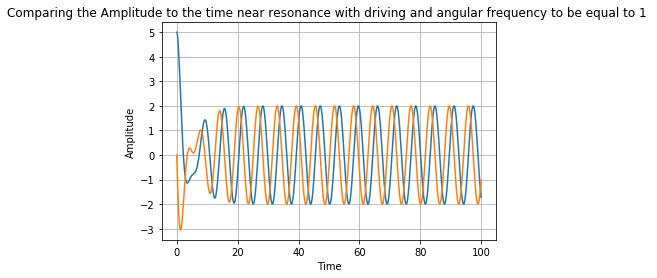

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate

def func_harmonic_damped_driven( state_vector, time, omega=1.0, gamma=0.25, omega_0=1.0):
    """
    This python function returns the time derivative of the state vector 
    for a damped+driven linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega_0*omega_0*x - 2*gamma*v*omega_0 + 1.0 * np.sin(omega*time)]
    return deriv

def func_harmonic_damped_driven_2( state_vector, time, omega=4.0, gamma=0.25, omega_0=1.0):
    """
    This python function returns the time derivative of the state vector 
    for a damped+driven linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega_0*omega_0*x - 2*gamma*v*omega_0 + 1.0 * np.sin(omega*time)]
    return deriv

def func_harmonic_damped_driven_3( state_vector, time, omega=1.0, gamma=0.25, omega_0=4.0):
    """
    This python function returns the time derivative of the state vector 
    for a damped+driven linear harmonic oscillator.  It can be called by
    an ODE integrator to determine the system trajectory.
    """
    x, v = state_vector
    deriv = [v, -omega_0*omega_0*x - 2*gamma*v*omega_0 + 1.0 * np.sin(omega*time)]
    return deriv


timesteps = np.linspace(0.0, 100.0, 999)
state_vector_initial = [5.0, 0.0]
state_vector_sequence = integrate.odeint( func_harmonic_damped_driven, state_vector_initial, timesteps )

state_vector_sequence_2 = integrate.odeint( func_harmonic_damped_driven_2, state_vector_initial, timesteps )

state_vector_sequence_3 = integrate.odeint( func_harmonic_damped_driven_3, state_vector_initial, timesteps )



plt.plot( timesteps, state_vector_sequence, label= '1')


plt.title('Comparing the Amplitude to the time near resonance with driving and angular frequency to be equal to 1 ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid('on')



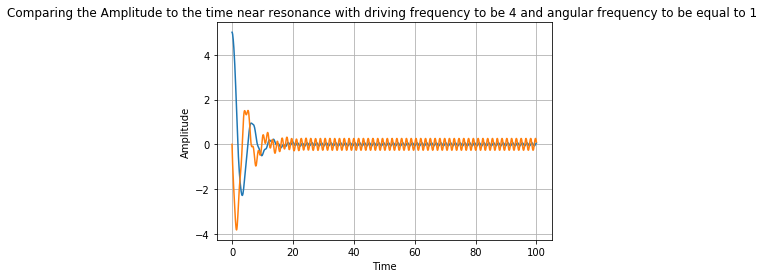

In [2]:
plt.plot( timesteps, state_vector_sequence_2, label= '2')

plt.title('Comparing the Amplitude to the time near resonance with driving frequency to be 4 and angular frequency to be equal to 1 ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid('on')

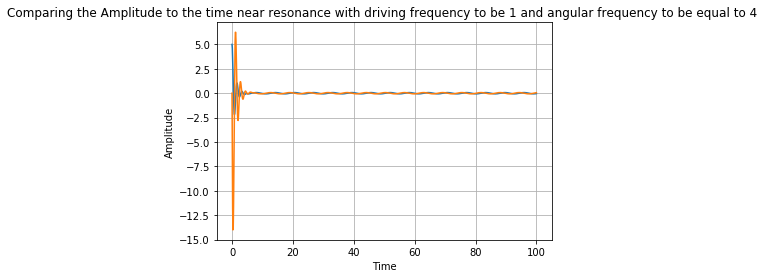

In [3]:
plt.plot( timesteps, state_vector_sequence_3, label= '3')

plt.title('Comparing the Amplitude to the time near resonance with driving frequency to be 1 and angular frequency to be equal to 4 ')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid('on')

Looking at the above figures we can see around time 30 is a good estimate to where the values take a sinosodal like function. So we will exclude the data previous to time 30. 

Changing the angular frequency and the driven frequency did effect the point at where resonance started. This is more evident with the last plot. But we can still safely say that time 30 is a fairly good estimate to where resonance starts. Especially taking into account that for the next part we will be looking at $\frac{\omega}{\omega_0}$ from 0 to 3.


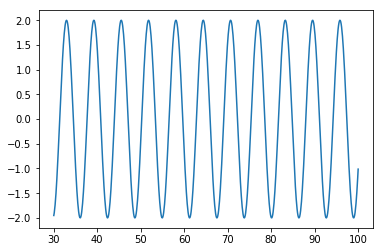

In [4]:
x=state_vector_sequence[:,1]
x_2=[]
time_2=[]
for values in range(300,999):
    x_2.append(x[values])
    time_2.append(timesteps[values])
plt.plot(time_2,x_2)   

Excluding the data before time 30, we do see that we get a sinosodal like function. 

Now we will try to create the plot comparing $\frac{\omega}{\omega_0}$ to the amplitude at a single time. This time would be chosen to be at a point where resonance occurs which we previously said to be any time larger than time 30. Although the plot was not created, two different attemps were made. 

The first attempt tried to create a dictionary which held keys for the different gamma values. These keys were associated with lists for different values of $\omega$. We assumed $omega_0$ to be a constant of 1. After plugging in all the values, we attemped to return the derivates. Then we thought to unpack the list and use the integrate.odeint function to calculate the values of x and v. The x and v values wouldve been seperated and then for either x or v a single value at a certain time t would be used. That list would be used to make the plot. 




In [5]:
def func_harmonic_damped_driven_2( state_vector, time):
    data={}
    gamma_values=[0.0,0.1,0.2,0.3,0.5,1.0]
    for gamma in gamma_values:
        sequences=[]
        w_w_0= np.linspace(0,3,999)
        for values in (w_w_0):
            x, v = state_vector
            omega=values
            omega_0=1
            deriv = [v, -omega_0*omega_0*x - 2*gamma*v*omega_0 + 1.0 * np.sin(omega*time)]
            sequence.append(deriv)
        data[gamma]=sequences
    return data

a=func_harmonic_damped_driven_2

sequences=[]


sequence_0=a[0.0]
sequence_1=a[0.1]
sequence_2=a[0.2]
sequence_3=a[0.3]
sequence_5=a[0.5]
sequence_10=a[1.0]
#timesteps = np.linspace(0.0, 100.0, 999)
#state_vector_initial = [5.0, 0.0]
#state_vector_sequence = integrate.odeint( deriv, state_vector_initial, timesteps )
#sequences.append(state_vecotr_sequence[:,1])

TypeError: 'function' object is not subscriptable

The second method that was used to calculate the derivative would be used by using functions within functions similarly to the method used when calculating a multivariable integral with a function that can only evaluate one variable at a time. Using this method we would be able to return derivatives. Further steps using this method would be similar to the previous attempt after unpacking the derivates.

## Conclusion 

After exploring Harmonic Oscillators, we were able to determine to create a function which returns the time derivate of a step function and attempted to create a resonance plot. 